# In this basic tutorial, you will learn the following:
- Basic commands
- Loading data
- Plotting data

This is a very brief and rough primer if you are new to Julia and wondering how to do simple things that are relevant for data analysis.
Defining a vector

In [1]:
x = [1, 3, 2, 5]
@show x
@show length(x)

x = [1, 3, 2, 5]
length(x) = 4


4

Operations between vectors

In [2]:
y = [4, 5, 6, 1]
z = x .+ y #elementwise operation

4-element Vector{Int64}:
 5
 8
 8
 6

Defining a matrix

In [10]:
X = [1  2 ; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

You can also do that from a vector using the reshape function

In [8]:
X = reshape([1, 2, 3, 4], 2, 2)

2×2 Matrix{Int64}:
 1  3
 2  4

But you have to be careful that it fills the matrix by column; so if you want to get the same result as before, you will need to permute the dimensions

In [9]:
X = permutedims(reshape([1, 2, 3, 4], 2, 2))

2×2 Matrix{Int64}:
 1  2
 3  4

Function calls can be split with the |> operator so that the above can also be written

In [11]:
X = reshape([1,2,3,4], 2, 2) |> permutedims

2×2 Matrix{Int64}:
 1  2
 3  4

You do not have to do that of course but we will sometimes use it in these tutorials.
There's a wealth of functions available for simple math operations

In [12]:
x = 4
@show x^2
@show sqrt(x)

x ^ 2 = 16
sqrt(x) = 2.0


2.0

Element wise operations on a collection can be done with the dot syntax:

In [13]:
sqrt.([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

The packages Statistics (from the standard library) and StatsBase offer a number of useful function for stats:

using Statistics, StatsBase
Note that if you don't have StatsBase, you can add it using using Pkg; Pkg.add("StatsBase"). 
- Right, let us now compute some simple statistics:

The packages Statistics (from the standard library) and StatsBase offer a number of useful function for stats:

In [16]:
using Statistics, StatsBase

In [17]:
x = randn(1_000) # 1_000 points iid from a N(0, 1)
μ = mean(x)
σ = std(x)
@show (μ, σ)

(μ, σ) = (3.454582542993967e-5, 0.9988383954215323)


(3.454582542993967e-5, 0.9988383954215323)

Indexing data starts at 1, use : to indicate the full range

In [18]:
X = [1 2; 3 4; 5 6]
@show X[1, 2]
@show X[:, 1]
@show X[1, :]
@show X[[1, 2], [1, 2]]

X[1, 2] = 2
X[:, 1] = [1, 3, 5]
X[1, :] = [1, 2]
X[[1, 2], [1, 2]] = [1 2; 3 4]


2×2 Matrix{Int64}:
 1  2
 3  4

size gives dimensions (nrows, ncolumns)


In [19]:
size(X)

(3, 2)

# Loading data

There are many ways to load data in Julia, one convenient one is via the CSV package.

- using CSV
: Many datasets are available via the RDatasets package

- using RDatasets
: And finally the DataFrames package allows to manipulate data easily

- using DataFrames

In [2]:
import Pkg; Pkg.add("RDatasets")

In [3]:
using CSV
using RDatasets
using DataFrames

In [4]:
auto = dataset("ISLR", "Auto")
first(auto, 3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0


The describe function allows to get an idea for the data:

In [5]:
describe(auto, :mean, :median, :std)

,variable,mean,median,std
,Symbol,Union…,Union…,Union…
1,MPG,23.4459,22.75,7.80501
2,Cylinders,5.47194,4.0,1.70578
3,Displacement,194.412,151.0,104.644
4,Horsepower,104.469,93.5,38.4912
5,Weight,2977.58,2803.5,849.403
6,Acceleration,15.5413,15.5,2.75886
7,Year,75.9796,76.0,3.68374
8,Origin,1.57653,1.0,0.805518
9,Name,,,


To retrieve column names, you can use names:

In [6]:
names(auto)

9-element Vector{String}:
 "MPG"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight"
 "Acceleration"
 "Year"
 "Origin"
 "Name"

You can also access the column names in other ways:

In [9]:
mpg = auto.MPG
mpg = auto[:, 1]
mpg = auto[:, :MPG]
#mpg |> :mean

392-element Vector{Float64}:
 18.0
 15.0
 18.0
 16.0
 17.0
 15.0
 14.0
 14.0
 14.0
 15.0
 15.0
 14.0
 15.0
  ⋮
 25.0
 38.0
 26.0
 22.0
 32.0
 36.0
 27.0
 27.0
 44.0
 32.0
 28.0
 31.0

To get dimensions you can use size and nrow and ncol

In [10]:
@show size(auto)
@show nrow(auto)
@show ncol(auto)

size(auto) = (392, 9)
nrow(auto) = 392
ncol(auto) = 9


9

# Plotting data

There are multiple libraries that can be used to plot things in Julia:

- Plots.jl which supports multiple plotting backends,

- Gadfly.jl influenced by the grammar of graphics and ggplot2

- PyPlot.jl basically matplotlib

- PGFPlotsX.jl and PGFPlots using the LaTeX package pgfplots,

- Makie, Gaston, Vega, ...

In these tutorials we use PyPlot but you could use another package of course.
- Do not forget to run 'import Pkg; Pkg.add("PyPlot")' to install PyPlot package if have not already done so.


┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/h62343la/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/h62343la/.julia/packages/Conda/sNGum/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/h62343la/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py38_0          14 KB
    freetype-2.10.4            |       ha233b18_0         564 KB
    jpeg-9b                    |       he5867d9_2         201 KB
    kiwisolver-1.3.1           |   py38h23ab428_0          52 KB
    lcms2-2.12                 |       hf1fd2bf_0         284 KB
    libpng-1.6.37              |       ha441bb4_0         262 KB
    libtiff-4.2.0              |       h87d7836_0         462 KB
    libwebp-base-1.2.0         |       h9ed2024_0         389 KB
    lz4-c-1.9.3                |       h23ab428_0         140 KB
    matplotlib-3.3.4           |   py38hecd8cb5_0          26 KB
    matplotlib-base-3.3.4      |   py38h8b3ea

┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/h62343la/.julia/packages/PyPlot/XHEG0/src/init.jl:118
┌ Info: Installing PyQt5 via the Conda pyqt package...
└ @ PyCall /Users/h62343la/.julia/packages/PyCall/BD546/src/PyCall.jl:711
┌ Info: Running `conda install -y pyqt` in root environment
└ @ Conda /Users/h62343la/.julia/packages/Conda/sNGum/src/Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/h62343la/.julia/conda/3

  added / updated specs:
    - pyqt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dbus-1.13.18               |       h18a8e69_0         445 KB
    expat-2.4.1                |       h23ab428_2         122 KB
    gettext-0.21.0             |       h7535e17_0         2.6 MB
    glib-2.69.0                |       hdf23fa2_0         2.7 MB
    icu-58.2                   |       h0a44026_3        10.1 MB
    libiconv-1.16              |       h1de35cc_0         693 KB
    libxml2-2.9.12             |       hcdb78fc_0         1.1 MB
    llvm-openmp-10.0.0         |       h28b9765_0         236 KB
    pcre-8.45                  |       h23ab428_0         181 KB
    pyqt-5.9.2                 |   py38h655552a_2         3.6 MB
    qt-5.9.7                   |       h468cd18_1  

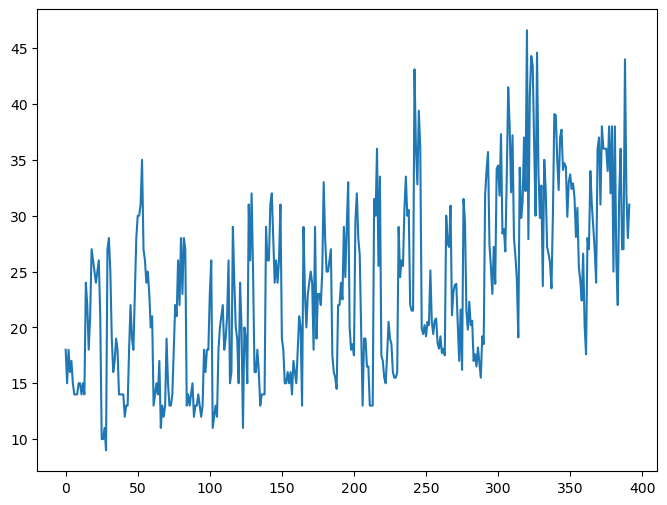

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd3794a4130>

In [13]:
using PyPlot

figure(figsize=(8,6))
plot(mpg)